## DEVELOPING MACHINE LEARNING MODELS FOR NON-INVASIVE DIGITAL HEALTH WEARABLES : A review on feature selection, biomaker identification,  and disease prediction
                              By
                         SYLVIA BURRIS

Audience:
My audience is digital health companies like Apple watch, google watch, Neuralink, Evidation Health, Norvadis, Genetech

## Aim of the study:
 Biomaker identification and feature selection for development of machine learning models for non-invasive digital health wearables. 

Dataset acquisition:

The dataset used here came from Kaggle with credits from Women in Data Science (WIDs) and GLOBAL OPEN SOURCE SEVERITY OF ILLNESS SCORE (GOSSIS) who made the data set available https://www.kaggle.com/c/widsdatathon2021

Background
Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system.

Knowledge about chronic conditions such as diabetes can inform clinical decisions about patient care and ultimately improve patient outcomes. Learn more about the global scale of diabetes on our Datathon News page, and make sure you are subscribed to the WiDS Datathon Mailing List to receive the latest updates, tutorials, and articles.



## 1. Exploratory data analysis




## Data wrangling 
* remove some nan values
* remove constants
* remove features that will cause data leakage
* Re-sample target sample

I did these in a previous notebook. In this note book I will be using a reduced and slightly cleaned up data set

In [ ]:
#from google.colab import files
#uploaded= files.upload()

In [ ]:
url1 = 'https://raw.githubusercontent.com/Fellylove/Buildweek_project/main/df_class_0_csv'
url2 = 'https://raw.githubusercontent.com/Fellylove/Buildweek_project/main/df_class_1_csv'

In [ ]:
#Uploading the dataset
import pandas as pd

df_class_0_under = pd.read_csv(url1)
df_class_1 = pd.read_csv(url2)

df = pd.concat([df_class_0_under, df_class_1], axis=0).set_index('encounter_id')

print(df.shape)
df.head()

(56302, 100)


,age,bmi,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
272409,82.0,22.705823,0,Caucasian,M,Floor,Floor,admit,Neuro ICU,2.538194,301.0,410.01,0,0,NaN,NaN,3.0,6.0,0.0,4.0,150.0,139.0,NaN,0,138.0,24.0,NaN,36.6,0,NaN,114.0,67.0,114.0,67.0,125.0,81.0,130.0,86.0,130.0,86.0,...,19.0,16.0,96.0,96.0,189.0,169.0,189.0,169.0,NaN,NaN,14.0,14.0,8.5,8.5,0.87,0.87,163.0,115.0,28.0,28.0,13.7,13.7,41.2,41.2,178.0,178.0,3.7,3.3,145.0,145.0,13.6,13.6,0,0,0,0,0,0,0,0
182425,22.0,17.374654,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.314583,122.0,703.03,0,0,8.0,0.74,3.0,5.0,0.0,1.0,73.0,104.0,34.3,1,59.0,27.0,142.0,36.3,1,6.1,88.0,47.0,88.0,47.0,104.0,42.0,96.0,59.0,96.0,59.0,...,17.0,14.0,100.0,98.0,105.0,90.0,105.0,90.0,36.3,36.3,8.0,8.0,7.3,7.3,0.74,0.74,73.0,73.0,22.0,22.0,12.0,12.0,34.3,34.3,149.0,149.0,3.6,3.6,142.0,142.0,6.1,6.1,0,0,0,0,0,0,0,0
243611,59.0,14.844926,0,Asian,F,Emergency Department,Accident & Emergency,admit,CCU-CTICU,0.299306,113.0,501.06,0,0,4.0,0.50,4.0,6.0,0.0,5.0,99.0,103.0,31.8,0,62.0,34.0,138.0,36.3,0,5.3,82.0,48.0,82.0,48.0,101.0,67.0,95.0,59.0,95.0,59.0,...,31.0,28.0,100.0,98.0,90.0,83.0,90.0,83.0,36.3,36.3,4.0,3.0,7.5,6.9,0.50,0.50,115.0,99.0,21.0,20.0,10.5,10.5,31.8,31.8,395.0,395.0,3.7,3.3,139.0,138.0,5.3,5.3,0,0,0,0,0,0,0,0
181743,33.0,23.911846,0,Caucasian,F,NaN,Accident & Emergency,admit,Cardiac ICU,0.057639,123.0,702.01,0,0,4.0,0.50,4.0,6.0,0.0,5.0,314.0,143.0,NaN,0,65.0,34.0,137.0,36.3,0,NaN,77.0,71.0,77.0,71.0,111.0,93.0,88.0,81.0,88.0,81.0,...,32.0,32.0,100.0,100.0,130.0,130.0,130.0,130.0,36.6,36.6,4.0,3.0,8.0,7.7,0.60,0.43,314.0,115.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3.3,2.5,140.0,137.0,NaN,NaN,0,0,0,0,0,0,0,0
263267,22.0,27.770313,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0.176389,117.0,106.01,0,0,NaN,NaN,4.0,6.0,0.0,5.0,NaN,51.0,35.5,0,52.0,26.0,NaN,36.5,0,21.9,68.0,47.0,68.0,47.0,72.0,51.0,78.0,57.0,78.0,57.0,...,22.0,18.0,99.0,98.0,119.0,116.0,119.0,116.0,36.8,36.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,12.1,35.5,35.5,182.0,182.0,NaN,NaN,NaN,NaN,21.9,21.9,0,0,0,0,0,0,0,0


## Data wrangling
* Here I will focus on data engineering



In [ ]:
df.isnull().sum().sort_values()

diabetes_mellitus                  0
solid_tumor_with_metastasis        0
ventilated_apache                  0
aids                               0
cirrhosis                          0
                               ...  
hematocrit_apache              11451
wbc_apache                     12588
h1_temp_min                    12971
h1_temp_max                    12971
hospital_admit_source          14643
Length: 100, dtype: int64

In [ ]:
df.columns

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'hospital_admit_source', 'icu_admit_source', 'icu_stay_type',
       'icu_type', 'pre_icu_los_days', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'bun_apache', 'creatinine_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache',
       'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_mi

In [ ]:
#fill all null values with mean

df = df.fillna(df.mean()) #research a little more about this

In [ ]:

df['diagnosis_apache'] = df['apache_2_diagnosis'] + df['apache_3j_diagnosis']
df['diabp_max']= (df['h1_diasbp_max']+ df['h1_diasbp_min']+ df['d1_diasbp_max'] + df['d1_diasbp_min'])/4

df['diasbp_noninvasive'] = (df['h1_diasbp_noninvasive_max'] + df['h1_diasbp_noninvasive_min'] +
                             df['d1_diasbp_noninvasive_max'] + df['d1_diasbp_noninvasive_min'] )/4    
       
df['heartrate'] = (df['heart_rate_apache']+ df['h1_heartrate_max'] + df['h1_heartrate_min']+ df['d1_heartrate_max']+ df['d1_heartrate_min'])/5   

df['mbp'] = (df['h1_mbp_max'] + df['h1_mbp_min'] + df['d1_mbp_max'] + df['d1_mbp_min'])/4
df['mbp_noninvasive']= (df['h1_mbp_noninvasive_max'] + df['h1_mbp_noninvasive_min'] + df['d1_mbp_noninvasive_max'] + df['d1_mbp_noninvasive_min'])/4
        
df['resprate'] = (df['resprate_apache']+ df['h1_resprate_max'] + df['h1_resprate_min']+ df['d1_resprate_max'] + df['d1_resprate_min'])/5

df['glucose'] = (df['glucose_apache'] + df['d1_glucose_max']+ df['d1_glucose_min'])/3
df['sodium'] = (df['d1_sodium_max'] + df['d1_sodium_min']+ df['sodium_apache'])/3
df['wbc'] = (df['wbc_apache'] + df['d1_wbc_max']+ df['d1_wbc_min'])/3
df['potassium'] = (df['d1_potassium_max'] + df['d1_potassium_min'])/2
df['platelets'] = (df['d1_platelets_max'] + df['d1_platelets_max'])/2
df['hematocrit'] = (df['hematocrit_apache'] + df['d1_hematocrit_max'] + df['d1_hematocrit_min'])/3

df['hemaglobin'] = (df['d1_hemaglobin_max'] + df['d1_hemaglobin_min'])/2

df['hco3'] = (df['d1_hco3_min'] + df['d1_hco3_max'])/2

df['creatinine'] = (df['creatinine_apache']+ df['d1_creatinine_max'] + df['d1_creatinine_min'])/3

df['d1_calcium'] = (df['d1_calcium_max'] + df['d1_calcium_min'])/2

df['bun'] = (df['bun_apache'] + df['d1_bun_max'] + df['d1_bun_min'])/3

df['temp'] = (df['h1_temp_max'] + df['h1_temp_min'] + df['d1_temp_max'] +df['d1_temp_min']+ df['temp_apache'])/5

df['sysbp_noninvasive'] = (df['h1_sysbp_noninvasive_max'] + df['h1_sysbp_noninvasive_min']+ df['d1_sysbp_noninvasive_max'] + df['d1_sysbp_noninvasive_min'])/4

df['sysbp']= (df['h1_sysbp_max'] + df['h1_sysbp_min'] + df['d1_sysbp_max'] + df['d1_sysbp_min'])/4

df['spo2'] = (df['h1_spo2_max'] + df['h1_spo2_min'] + df['d1_spo2_max'] + df['d1_spo2_min'])/4











In [ ]:
df = df.drop(columns=['heart_rate_apache','resprate_apache', 'glucose_apache',
                      'sodium_apache', 'hematocrit_apache', 'creatinine_apache', 'bun_apache', 'temp_apache',
                      'wbc_apache', 'd1_diasbp_max','d1_diasbp_min', 'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min', 
                      'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
                      'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
                      'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                      'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
                      'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
                      'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
                      'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
                      'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
                      'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
                      'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
                      'h1_temp_max', 'h1_temp_min', 'd1_bun_max', 'd1_bun_min',
                      'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max',
                      'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max',
                      'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min',
                      'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max',
                      'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
                      'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min','apache_2_diagnosis',
                      'apache_3j_diagnosis'])

In [ ]:
df.shape

df.head()

,age,bmi,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,map_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,diagnosis_apache,diabp_max,diasbp_noninvasive,heartrate,mbp,mbp_noninvasive,resprate,glucose,sodium,wbc,potassium,platelets,hematocrit,hemaglobin,hco3,creatinine,d1_calcium,bun,temp,sysbp_noninvasive,sysbp,spo2
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
272409,82.0,22.705823,0,Caucasian,M,Floor,Floor,admit,Neuro ICU,2.538194,0,0,3.0,6.0,0.0,4.0,0,138.0,0,0,0,0,0,0,0,0,0,711.01,88.25,88.25,112.0,108.00,108.00,19.2,142.666667,142.605360,13.140499,3.500000,178.000000,38.371660,13.700000,28.000000,1.117834,8.500000,18.593947,36.685395,170.50,170.50,95.50
182425,22.0,17.374654,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.314583,0,0,3.0,5.0,0.0,1.0,1,59.0,1,0,0,0,0,0,0,0,0,825.03,60.00,60.00,83.8,70.25,70.25,19.2,73.000000,142.000000,6.100000,3.600000,149.000000,34.300000,12.000000,22.000000,0.740000,7.300000,8.000000,36.380000,104.25,104.25,98.50
243611,59.0,14.844926,0,Asian,F,Emergency Department,Accident & Emergency,admit,CCU-CTICU,0.299306,0,0,4.0,6.0,0.0,5.0,0,62.0,0,0,0,0,0,0,0,0,0,614.06,59.50,59.50,82.0,71.00,71.00,30.2,104.333333,138.333333,5.300000,3.500000,395.000000,31.800000,10.500000,20.500000,0.500000,7.200000,3.666667,36.280000,102.25,102.25,99.00
181743,33.0,23.911846,0,Caucasian,F,NaN,Accident & Emergency,admit,Cardiac ICU,0.057639,0,0,4.0,6.0,0.0,5.0,0,65.0,0,0,0,0,0,0,0,0,0,825.01,75.50,75.50,113.8,86.25,86.25,30.0,247.666667,138.000000,12.051339,2.900000,207.122538,33.218331,11.068895,10.500000,0.510000,7.850000,3.666667,36.480000,127.25,127.25,100.00
263267,22.0,27.770313,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0.176389,0,0,4.0,6.0,0.0,5.0,0,52.0,0,0,0,0,0,0,0,0,0,223.01,58.25,58.25,61.8,70.25,70.25,21.2,166.218298,138.151030,21.900000,4.122169,182.000000,35.500000,12.100000,23.723517,1.573652,8.288942,26.907672,36.680000,111.50,111.50,98.75


## BASELINE MODEL

In [ ]:
print('Baseline prediction is:', df['diabetes_mellitus'].value_counts(normalize = True).max())

Baseline prediction is: 0.5


## spliting data into train and validation vectors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train, val = train_test_split (df, train_size = 0.80, test_size= 0.20, stratify = df['diabetes_mellitus'], random_state = 42)

train.shape, val.shape

((45041, 49), (11261, 49))

In [ ]:
target = 'diabetes_mellitus'

features = df.columns.drop ([target])

X_train = train [features]

y_train = train [target]

X_val = val [features]

y_val = val [target]

## BUILD MODEL: Random Forest classifier

In [ ]:
!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 3.7MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

model = make_pipeline(
  ce.OrdinalEncoder(),
  StandardScaler(),
  RandomForestClassifier(n_estimators=200, max_depth=25, n_jobs=-1, max_features= 0.6)
)

model.fit(X_train, y_train)
print('Validation Accuracy', model.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Validation Accuracy 0.7378563182665838


## Feature importance and feature selection

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 4.9MB/s 


In [ ]:
#ELI5 permutation importance

transformers = make_pipeline(
     ce.OrdinalEncoder(), 
     SimpleImputer(strategy='median')
 )

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model1 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
model1.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model1, 
    scoring='accuracy',
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
#show feature importances

feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

glucose                        0.150910
bmi                            0.025433
age                            0.006110
bun                            0.004334
arf_apache                     0.003854
diabp_max                      0.003073
diagnosis_apache               0.002966
hemaglobin                     0.002344
d1_calcium                     0.001243
gcs_motor_apache               0.001172
ethnicity                      0.000995
mbp                            0.000870
sysbp                          0.000764
creatinine                     0.000746
sysbp_noninvasive              0.000639
ventilated_apache              0.000568
map_apache                     0.000444
wbc                            0.000426
sodium                         0.000373
diasbp_noninvasive             0.000284
gcs_unable_apache              0.000284
immunosuppression              0.000231
cirrhosis                      0.000231
apache_post_operative          0.000142
icu_stay_type                  0.000089


In [ ]:
#Let;s look at permutation importances

eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names
)

Weight,Feature
0.1509 ± 0.0090,glucose
0.0254 ± 0.0032,bmi
0.0061 ± 0.0026,age
0.0043 ± 0.0036,bun
0.0039 ± 0.0011,arf_apache
0.0031 ± 0.0034,diabp_max
0.0030 ± 0.0022,diagnosis_apache
0.0023 ± 0.0023,hemaglobin
0.0012 ± 0.0019,d1_calcium
0.0012 ± 0.0011,gcs_motor_apache


In [ ]:
#remove features with feature importance <0
minimum_importance = 0
mask=permuter.feature_importances_ > minimum_importance 
features1 = X_train.columns[mask]
X_train=X_train[features1]

In [ ]:
X_val = X_val[features1]

In [ ]:
print(X_train.shape)
X_train.columns

(45041, 25)


Index(['age', 'bmi', 'ethnicity', 'icu_stay_type', 'apache_post_operative',
       'arf_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'map_apache',
       'ventilated_apache', 'cirrhosis', 'immunosuppression',
       'diagnosis_apache', 'diabp_max', 'diasbp_noninvasive', 'mbp', 'glucose',
       'sodium', 'wbc', 'hemaglobin', 'creatinine', 'd1_calcium', 'bun',
       'sysbp_noninvasive', 'sysbp'],
      dtype='object')

## More DATA WRANGLING






























































































## Performance metrics

Accuracy

Parameter hypertuning : XGBOOST classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

model2 = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(strategy= 'most_frequent'),
  StandardScaler(),
    XGBClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
)

model2.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ethnicity', 'icu_stay_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': Caucasian           1
Other/Unknown       2
African American    3
Native American     4
Hispanic            5
Asian               6
NaN                 7
dtype: int64},
                                         {'col': 'icu_stay_type',
                                          'data_type': dtyp...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_ste

In [ ]:
print('Validation Accuracy', model2.score(X_val, y_val))++

Validation Accuracy 0.7448716810229997


In [ ]:
# Xgboost parameters
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model_param = XGBClassifier(
    n_estimators=1000, 
    max_depth=3,       
    learning_rate=0.2, 
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model_param.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error', 
          early_stopping_rounds=50) 

[0]	validation_0-error:0.294576	validation_1-error:0.298908
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.287804	validation_1-error:0.298197
[2]	validation_0-error:0.287827	validation_1-error:0.298109
[3]	validation_0-error:0.285296	validation_1-error:0.294734
[4]	validation_0-error:0.285495	validation_1-error:0.294556
[5]	validation_0-error:0.284363	validation_1-error:0.293846
[6]	validation_0-error:0.283053	validation_1-error:0.292336
[7]	validation_0-error:0.279745	validation_1-error:0.289228
[8]	validation_0-error:0.27697	validation_1-error:0.286653
[9]	validation_0-error:0.275904	validation_1-error:0.285943
[10]	validation_0-error:0.273307	validation_1-error:0.285055
[11]	validation_0-error:0.271242	validation_1-error:0.283101
[12]	validation_0-error:0.269177	validation_1-error:0.280703
[13]	validation_0-error:0.268555	validation_1-error:0.279

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model_param.score(X_val_encoded, y_val)

0.7458485036852855

## classification report

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model2.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      5631
           1       0.74      0.75      0.75      5630

    accuracy                           0.74     11261
   macro avg       0.74      0.74      0.74     11261
weighted avg       0.74      0.74      0.74     11261



## AUC-ROC plot

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model2.predict_proba(X_val)[:,-1]  
roc_auc_score(y_val, y_pred_proba)

0.8187612786739734

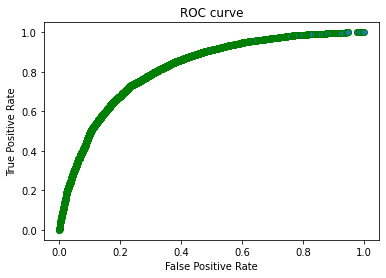

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = model2.predict_proba(X_val)[:,-1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, edgecolors= 'green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## setting precision and recall

In [ ]:
from ipywidgets import interact, fixed
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt


def my_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba > threshold
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.show()
    print(classification_report(y_true, y_pred))
    my_confusion_matrix(y_true, y_pred)

interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0, 1, 0.02));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## PDP plot

In [ ]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 72kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=cb74aa347a93e88880bd3eee3aaa70b3ffa414b476e5d2fcf5b7ac80bda402cf
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=5a258e12cb6b7a22d95deff400584e76684ba321803a8374b4ed534f7324a88d
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot

feature2 = 'glucose'

isolated = pdp_isolate(
    model=model2, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature2,
    num_grid_points=10
)

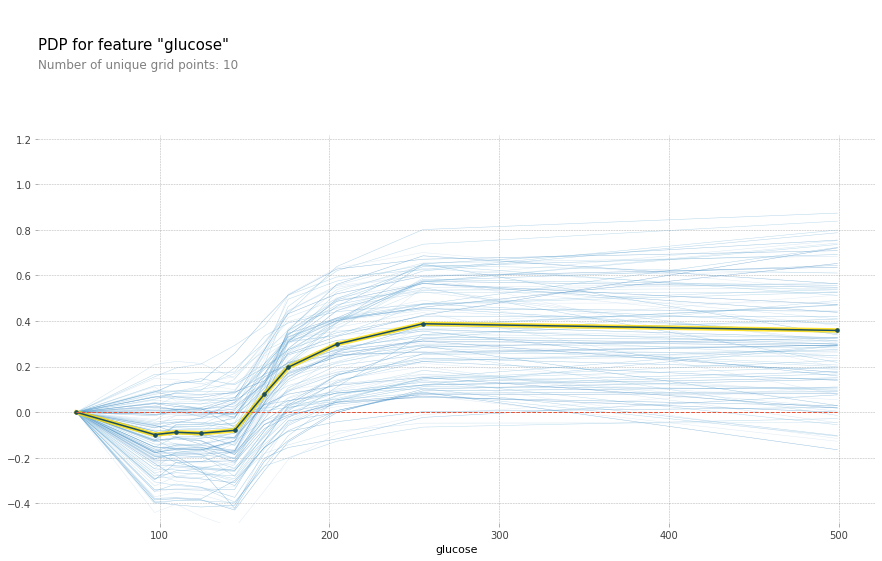

In [ ]:
pdp_plot(isolated, feature_name=feature2, plot_lines=True, frac_to_plot=0.01);

## Shapley

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model4 = XGBClassifier(n_estimators=1000, n_jobs=-1)
model4.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.765087	validation_1-auc:0.758093
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.779342	validation_1-auc:0.771727
[2]	validation_0-auc:0.781864	validation_1-auc:0.773964
[3]	validation_0-auc:0.782909	validation_1-auc:0.774704
[4]	validation_0-auc:0.784255	validation_1-auc:0.776722
[5]	validation_0-auc:0.784938	validation_1-auc:0.77741
[6]	validation_0-auc:0.789558	validation_1-auc:0.781588
[7]	validation_0-auc:0.789533	validation_1-auc:0.781378
[8]	validation_0-auc:0.79116	validation_1-auc:0.782997
[9]	validation_0-auc:0.792115	validation_1-auc:0.783824
[10]	validation_0-auc:0.793579	validation_1-auc:0.785426
[11]	validation_0-auc:0.794335	validation_1-auc:0.785968
[12]	validation_0-auc:0.794752	validation_1-auc:0.78652
[13]	validation_0-auc:0.795469	validation_1-auc:0.787326
[14]	validation_0-auc:0.796779	validation_1-auc:0.789087
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# I am going to use index 4000
row = X_val.iloc[[4000]]
row

,age,bmi,ethnicity,icu_stay_type,apache_post_operative,arf_apache,gcs_motor_apache,gcs_unable_apache,map_apache,ventilated_apache,cirrhosis,immunosuppression,diagnosis_apache,diabp_max,diasbp_noninvasive,mbp,glucose,sodium,wbc,hemaglobin,creatinine,d1_calcium,bun,sysbp_noninvasive,sysbp
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,
235485,68.0,24.84126,Caucasian,admit,0,0,5.510055,1.0,153.0,1,0,0,311.01,60.5,60.5,80.0,142.333333,145.333333,10.92,14.7,0.733333,7.65,24.666667,113.5,113.5


In [ ]:
import shap

explainer = shap.TreeExplainer(model4)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

Find the blog post here; https://sylviaf-ssanyu.medium.com/developing-machine-learning-models-for-non-invasive-digital-health-wearables-a-review-on-feature-362bf813baba